In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense
from tensorflow.keras.utils import to_categorical
import keras
import tensorflow
from keras.layers import Dropout, BatchNormalization
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
import random
from sklearn.metrics import roc_curve, auc  # Import roc_curve and auc functions from sklearn.metrics
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
import seaborn as sns
from keras.optimizers import Adam

# Load your dataset
df = pd.read_csv("../DataSet/Commands_Classification_Dataset7.csv",encoding="latin1")  # Update with your dataset filename



In [2]:
#df['Subclass'].unique()
df['Class'].unique()

new_df=df
new_df

,Class,Subclass,SubclassCategory,Commands,Response,Label
0,Bike,Edge,Battery/Fuel,What is my current battery level?,Updating please wait,1
1,Bike,Edge,Battery/Fuel,How much range do I have left on my battery?,Updating please wait,1
2,Bike,Edge,Battery/Fuel,When was the last time my battery was charged?,Updating please wait,1
3,Bike,Edge,Battery/Fuel,How long until my battery is fully charged?,Updating please wait,1
4,Bike,Edge,Battery/Fuel,How long should I charge my vehicle for a suff...,Updating please wait,1
...,...,...,...,...,...,...
2983,NonBike,Not needed,NC,Perform my pets marriage,It is a non bike command,0
2984,NonBike,Not needed,NC,Perform my dogs marriage,It is a non bike command,0
2985,NonBike,Not needed,NC,check blood pressure,It is a non bike command,0
2986,NonBike,Not needed,NC,check balloon pressure,It is a non bike command,0


In [3]:
new_df['Class'].unique()

X=new_df['Commands']
X

0                       What is my current battery level?
1            How much range do I have left on my battery?
2          When was the last time my battery was charged?
3             How long until my battery is fully charged?
4       How long should I charge my vehicle for a suff...
                              ...                        
2983                             Perform my pets marriage
2984                             Perform my dogs marriage
2985                                 check blood pressure
2986                              check balloon pressure 
2987                                       check my books
Name: Commands, Length: 2988, dtype: object

In [4]:
# Automatically convert categorical values to labels
new_df['Class_Label'], _ = pd.factorize(new_df['Class'])
new_df['Class_Label']


0       0
1       0
2       0
3       0
4       0
       ..
2983    1
2984    1
2985    1
2986    1
2987    1
Name: Class_Label, Length: 2988, dtype: int64

In [5]:
new_df

,Class,Subclass,SubclassCategory,Commands,Response,Label,Class_Label
0,Bike,Edge,Battery/Fuel,What is my current battery level?,Updating please wait,1,0
1,Bike,Edge,Battery/Fuel,How much range do I have left on my battery?,Updating please wait,1,0
2,Bike,Edge,Battery/Fuel,When was the last time my battery was charged?,Updating please wait,1,0
3,Bike,Edge,Battery/Fuel,How long until my battery is fully charged?,Updating please wait,1,0
4,Bike,Edge,Battery/Fuel,How long should I charge my vehicle for a suff...,Updating please wait,1,0
...,...,...,...,...,...,...,...
2983,NonBike,Not needed,NC,Perform my pets marriage,It is a non bike command,0,1
2984,NonBike,Not needed,NC,Perform my dogs marriage,It is a non bike command,0,1
2985,NonBike,Not needed,NC,check blood pressure,It is a non bike command,0,1
2986,NonBike,Not needed,NC,check balloon pressure,It is a non bike command,0,1


In [6]:
y=new_df['Class_Label']
y

0       0
1       0
2       0
3       0
4       0
       ..
2983    1
2984    1
2985    1
2986    1
2987    1
Name: Class_Label, Length: 2988, dtype: int64

In [7]:
y.unique()

array([0, 1], dtype=int64)

In [8]:
# Function to predict the class of a command
def predict_class(command, tokenizer,model,max_sequence_length):
    sequence = tokenizer.texts_to_sequences([command])
    padded_sequence = pad_sequences(sequence, maxlen=max_sequence_length, padding='post')
    prediction = model.predict(padded_sequence)
    predicted_class_index = np.argmax(prediction)
    return predicted_class_index

In [9]:
def Main_Model(X,y):
    # Assuming 'Class' column contains the commands and 'Label' column contains the labels for multiclass classification
    # Assuming df is your DataFrame
    # X = df['Commands']  # Input features
    # y = df['Label']      # Target variable

    # Set seed for reproducibility
    seed_value = 0
    np.random.seed(seed_value)
    tf.random.set_seed(seed_value)
    random.seed(seed_value)

    
    # Tokenize the text data
    tokenizer = Tokenizer()
    tokenizer.fit_on_texts(X)
    X_sequences = tokenizer.texts_to_sequences(X)

    # Padding sequences to make them of equal length
    max_sequence_length = max([len(seq) for seq in X_sequences])
    X_padded = pad_sequences(X_sequences, maxlen=max_sequence_length, padding='post')

    # Convert labels to one-hot encoding
    y_encoded = to_categorical(y)

    # Split the dataset into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X_padded, y_encoded, test_size=0.2, random_state=seed_value, stratify=y_encoded)
    #, stratify=y_encoded

    # Define the RNN model for multiclass classification
    num_classes = len(np.unique(y))  # Number of unique classes
    model = Sequential()
    model.add(Embedding(input_dim=len(tokenizer.word_index)+1, output_dim=500, input_length=max_sequence_length))
    #model.add(Embedding(input_dim=len(tokenizer.word_index)+1, output_dim=600, input_length=max_sequence_length))
    model.add(LSTM(32, return_sequences=True))
    model.add(LSTM(16, return_sequences=True))
    model.add(LSTM(8, return_sequences=True))
    model.add(LSTM(4, return_sequences=True))
    #model.add(LSTM(2, return_sequences=True))
    model.add(LSTM(2))
    model.add(Dense(num_classes, activation='softmax'))  # Use softmax activation for multiclass classification

    # Define the RNN model with improved architecture
    # model = Sequential()
    # model.add(Embedding(input_dim=len(tokenizer.word_index)+1, output_dim=100, input_length=max_sequence_length))
    # model.add(LSTM(256, return_sequences=True))
    # model.add(Dropout(0.2))  # Add dropout layer
    # model.add(BatchNormalization())  # Add batch normalization layer
    # model.add(LSTM(128, return_sequences=True))
    # model.add(Dropout(0.2))  # Add dropout layer
    # model.add(BatchNormalization())  # Add batch normalization layer
    # model.add(LSTM(64, return_sequences=True))
    # model.add(Dropout(0.2))  # Add dropout layer
    # model.add(BatchNormalization())  # Add batch normalization layer
    # model.add(LSTM(32))
    # model.add(Dense(num_classes, activation='softmax'))

    # Compile and train the model as before...

    loss = tf.keras.losses.BinaryCrossentropy()
    
    # Set the learning rate
    learning_rate = 0.001  # Example value, adjust as needed

    # Initialize Adam optimizer with the specified learning rate
    optimizer = Adam(learning_rate=learning_rate)
    
    # Compile the model with categorical cross-entropy loss
    #model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    model.compile(optimizer=optimizer, loss=loss, metrics=['accuracy'])
    # Train the model
    history=model.fit(X_train, y_train, epochs=16, batch_size=128, validation_data=(X_test, y_test))

###########################################################################################################


###########################################################################################################
    # Get predicted probabilities
    y_pred_prob = model.predict(X_test)

    # Compute ROC curve and ROC area for each class
    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    for i in range(num_classes):
        fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_pred_prob[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])

    # Plot ROC curve
    plt.figure()
    lw = 2
    colors = ['blue', 'red', 'green', 'orange', 'purple']  # Define colors for multiple classes
    for i, color in zip(range(num_classes), colors):
        plt.plot(fpr[i], tpr[i], color=color, lw=lw, label='ROC curve (area = %0.2f)' % roc_auc[i])
    plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend(loc="lower right")
    plt.show()

############################################################################################
    # Get and print training and validation accuracy from history
    training_accuracy = history.history['accuracy'][-1]
    validation_accuracy = history.history['val_accuracy'][-1]
    print("Training Accuracy:", training_accuracy)
    print("Validation Accuracy:", validation_accuracy)

    # Evaluate the model
    loss, accuracy = model.evaluate(X_test, y_test)
    print("Test Loss:", loss)
    print("Test Accuracy:", accuracy)

    # Calculate precision, recall, F1-score, and support
    y_pred = np.argmax(model.predict(X_test), axis=1)
    classification_rep = classification_report(np.argmax(y_test, axis=1), y_pred)

    print("Classification Report:\n", classification_rep)

    
    
    # Calculate and print confusion matrix
    cm = confusion_matrix(np.argmax(y_test, axis=1), y_pred)

    # Define class labels
    class_labels = ['Bike', 'NonBike']

    # Plot confusion matrix
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False, xticklabels=class_labels, yticklabels=class_labels)
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.title('Confusion Matrix')
    plt.show()
    

    # Plot both training and testing accuracy curves
    plt.plot(history.history['accuracy'], label='Training Accuracy')
    plt.plot(history.history['val_accuracy'], label='Testing Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.ylim([0, 1])
    plt.legend()
    plt.show()

    return tokenizer,model,max_sequence_length
############



Epoch 1/16


C:\Users\anirban.saha\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


19/19 ━━━━━━━━━━━━━━━━━━━━ 6s 80ms/step - accuracy: 0.5327 - loss: 0.6896 - val_accuracy: 0.9013 - val_loss: 0.6458
Epoch 2/16
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 52ms/step - accuracy: 0.9301 - loss: 0.5992 - val_accuracy: 0.9532 - val_loss: 0.5283
Epoch 3/16
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 52ms/step - accuracy: 0.9754 - loss: 0.5004 - val_accuracy: 0.9632 - val_loss: 0.4558
Epoch 4/16
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 53ms/step - accuracy: 0.9881 - loss: 0.4293 - val_accuracy: 0.9699 - val_loss: 0.4177
Epoch 5/16
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 49ms/step - accuracy: 0.9914 - loss: 0.3952 - val_accuracy: 0.9582 - val_loss: 0.4065
Epoch 6/16
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 52ms/step - accuracy: 0.9917 - loss: 0.3761 - val_accuracy: 0.9264 - val_loss: 0.4183
Epoch 7/16
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 53ms/step - accuracy: 0.9898 - loss: 0.3635 - val_accuracy: 0.9599 - val_loss: 0.3814
Epoch 8/16
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 52ms/step - accuracy: 0.9898 - loss: 0.3515 - val_accuracy: 0.9682 - val_loss: 0.

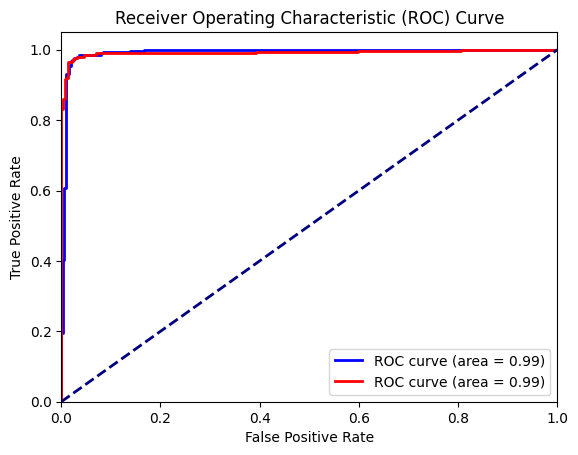

Training Accuracy: 0.9966527223587036
Validation Accuracy: 0.9732441306114197
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9612 - loss: 0.3014
Test Loss: 0.2870189845561981
Test Accuracy: 0.9732441306114197
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step
Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.99      0.97       288
           1       0.99      0.96      0.97       310

    accuracy                           0.97       598
   macro avg       0.97      0.97      0.97       598
weighted avg       0.97      0.97      0.97       598



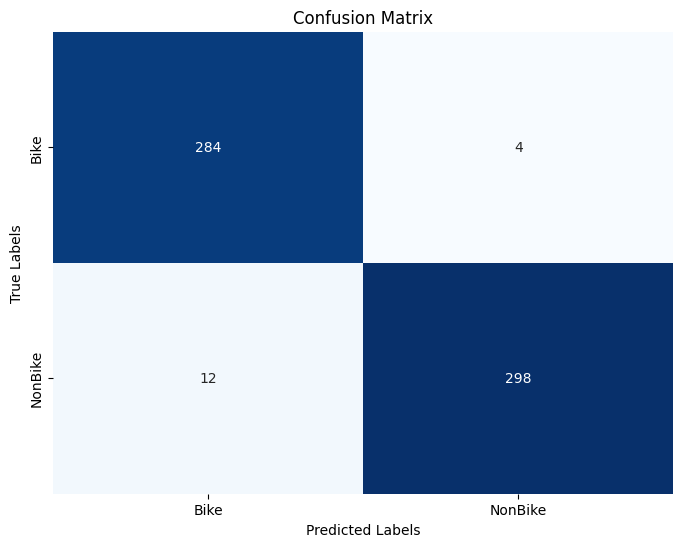

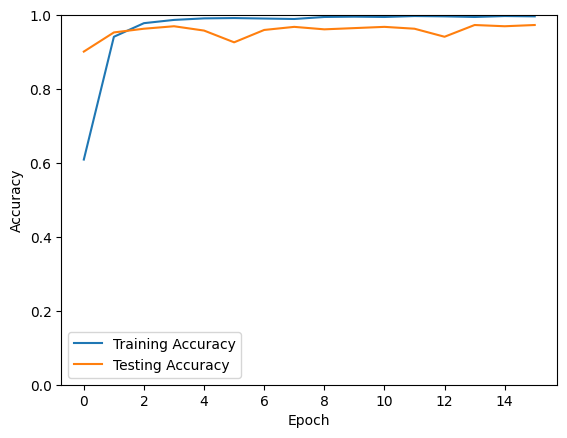

In [10]:
tokenizer, model, max_sequence_length=Main_Model(X,y)

In [11]:
#y_encoded[11]
print(y.count())
print(y.unique())

2988
[0 1]


In [20]:
import joblib
# Assuming model is your trained model object
joblib.dump(model, './RNN_save_model/LSTM_BNB/MAINMODEL/RNN_Multiclass_Subclass.joblib')
joblib.dump(tokenizer, './RNN_save_model/LSTM_BNB/MAINMODEL/tokenizer.joblib')
joblib.dump(max_sequence_length, './RNN_save_model/LSTM_BNB/MAINMODEL/max_sequence_length_mainModel.joblib')


In [12]:
# Example usage:
#command_input = input("Enter a command: ")
command_input="Go to Kolkata"
print(command_input)
prediction = predict_class(command_input,tokenizer,model,max_sequence_length)
if(prediction==0):
    print("BIKE :", prediction)
elif(prediction==1):
    print("NONBIKE :", prediction)
else:
    print("Dont know")


Go to Kolkata
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
BIKE : 0


In [13]:
def output(df_test,tokenizer,model,max_sequence_length):
    # Set pandas display options to show all rows
    #pd.set_option('display.max_rows', None)

    results=[]
    for cmds in df_test['Command']:
        prediction = predict_class(cmds,tokenizer,model,max_sequence_length)
        if(prediction==0):
            print("BIKE :", prediction)
            results.append('BIKE')
        elif(prediction==1):
            print("NONBIKE :", prediction)
            results.append('NONBIKE')
        else:
            print("Dont know")
            
    print(results)

    # Convert list to DataFrame
    df_testResult = pd.DataFrame(results, columns=['Test_Result_BNB'])
    #df_testResult
    dfconcat_testResult= pd.concat([df_test['Command'],df_test['Class'], df_testResult['Test_Result_BNB']], axis=1)
    # Convert values in 'SubClass' column to uppercase
    dfconcat_testResult['Class'] = dfconcat_testResult['Class'].str.upper()
    # Create 'TrueFalse' column based on conditions
    dfconcat_testResult['TrueFalse'] = dfconcat_testResult['Class'] == dfconcat_testResult['Test_Result_BNB'].str.upper()
    #print(dfconcat_testResult)

    # Assuming dfconcat_testResult is your DataFrame
    # Count the occurrences of each unique value in the 'TrueFalse' column
    true_false_counts = dfconcat_testResult['TrueFalse'].value_counts()
    # Get the count of True predictions
    true_count = true_false_counts.get(True, 0)
    # Calculate the percentage of True predictions
    true_percentage = (true_count / len(dfconcat_testResult)) * 100
    #print("Percentage of True Predictions:", true_percentage)
    return true_percentage, dfconcat_testResult

In [14]:
####Bike#####
df_test = pd.read_csv("../DataSet/Comparision_AvsS.csv",encoding="latin1")  # Update with your dataset filename
true_percentage, dfconcat_testResult=output(df_test,tokenizer,model,max_sequence_length)
print(true_percentage)
dfconcat_testResult

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
BIKE : 0
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
BIKE : 0
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
BIKE : 0
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
BIKE : 0
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
BIKE : 0
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
BIKE : 0
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
BIKE : 0
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
BIKE : 0
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
BIKE : 0
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
BIKE : 0
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
BIKE : 0
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
BIKE : 0
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
BIKE : 0
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
BIKE : 0
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
BIKE : 0
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
BIKE : 0
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
BIKE : 0
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
BIKE : 0
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
BIKE : 0
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
BIKE : 0
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
BIKE : 0
1/1 ━━━━━━━━━

,Command,Class,Test_Result_BNB,TrueFalse
0,Please check for update,BIKE,BIKE,True
1,Please show me current update,BIKE,BIKE,True
2,please perform bike update,BIKE,BIKE,True
3,please kindly perform bike update,BIKE,BIKE,True
4,will I reach hyderabad with current fuel,BIKE,BIKE,True
5,Check for update,BIKE,BIKE,True
6,Show me current update,BIKE,BIKE,True
7,perform bike update,BIKE,BIKE,True
8,kindly perform bike update,BIKE,BIKE,True
9,Kindly tell me whether will I reach hyderabad...,BIKE,BIKE,True


In [15]:
####Non Bike#####
df_test = pd.read_csv("../DataSet/Comparision_AvsS_BNB.csv",encoding="latin1")  # Update with your dataset filename
#df_test
true_percentage, dfconcat_testResult=output(df_test,tokenizer,model,max_sequence_length)
print(true_percentage)
dfconcat_testResult

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
BIKE : 0
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
NONBIKE : 1
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
NONBIKE : 1
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
BIKE : 0
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
NONBIKE : 1
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
NONBIKE : 1
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
NONBIKE : 1
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
NONBIKE : 1
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
NONBIKE : 1
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
NONBIKE : 1
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
BIKE : 0
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
NONBIKE : 1
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
NONBIKE : 1
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
NONBIKE : 1
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
BIKE : 0
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
BIKE : 0
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
NONBIKE : 1
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
NONBIKE : 1
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
NONBIKE : 1
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
NONBIKE : 1
1/1 ━━━━━━━━━━━

,Command,Class,Test_Result_BNB,TrueFalse
0,Play uno/cards with me,NONBIKE,BIKE,False
1,Participate in tree plantation drive,NONBIKE,NONBIKE,True
2,Experiment and create DIY lamps,NONBIKE,NONBIKE,True
3,Do stretching and yoga with me,NONBIKE,BIKE,False
4,Participate in photography contest,NONBIKE,NONBIKE,True
5,Create DIY skincare products,NONBIKE,NONBIKE,True
6,Clean wipe the floor,NONBIKE,NONBIKE,True
7,Wash the bedsheets,NONBIKE,NONBIKE,True
8,Give clothes for laundry,NONBIKE,NONBIKE,True
9,Pay the dues,NONBIKE,NONBIKE,True
